In [65]:
import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats
from functools import reduce
from patsy import dmatrices
import statsmodels.formula.api as sm
import statsmodels.formula.api as smf

In [66]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'cits.csv'),
                  sep=",", low_memory=False)

In [67]:
df = data[['distname', 'treat', 'year', 'students_hisp', 'type_rural', 'type_suburban', 'type_urban', 'students_num']]

df.reset_index().head()

,index,distname,treat,year,students_hisp,type_rural,type_suburban,type_urban,students_num
0,0,CAYUGA ISD,1,2012,0.050847,1,0,0,590
1,1,ELKHART ISD,1,2012,0.078678,0,0,0,1271
2,2,FRANKSTON ISD,1,2012,0.103683,1,0,0,733
3,3,NECHES ISD,1,2012,0.099256,1,0,0,403
4,4,PALESTINE ISD,1,2012,0.389752,0,0,0,3220


In [68]:
df_dist = df[df.year == 2015][['distname', 'treat', 'type_rural', 'type_suburban', 'type_urban']]
df_12 = df[df.year == 2012][['distname', 'students_hisp', 'students_num']].rename(columns = {'students_hisp': 'hisp12', 'students_num': 'num12'})
df_13 = df[df.year == 2013][['distname', 'students_hisp', 'students_num']].rename(columns = {'students_hisp': 'hisp13', 'students_num': 'num13'})
df_14 = df[df.year == 2014][['distname', 'students_hisp', 'students_num']].rename(columns = {'students_hisp': 'hisp14', 'students_num': 'num14'})
df_15 = df[df.year == 2015][['distname', 'students_hisp', 'students_num']].rename(columns = {'students_hisp': 'hisp15', 'students_num': 'num15'})
df = reduce(lambda x, y: pd.merge(x, y, on = 'distname'), [df_dist, df_12, df_13, df_14, df_15])
df.tail()

,distname,treat,type_rural,type_suburban,type_urban,hisp12,num12,hisp13,num13,hisp14,num14,hisp15,num15
865,GRAHAM ISD,1,0,0,0,0.254257,2525,0.264180,2574,0.286547,2572,0.304731,2494
866,NEWCASTLE ISD,1,1,0,0,0.095745,188,0.128205,195,0.132701,211,0.100000,210
867,OLNEY ISD,1,1,0,0,0.369681,752,0.372654,746,0.362117,718,0.365517,725
868,ZAPATA COUNTY ISD,1,0,1,0,0.990449,3455,0.988842,3585,0.991101,3596,0.989937,3677
869,LA PRYOR ISD,0,1,0,0,0.944325,467,0.941788,481,0.928571,476,0.939959,483


In [69]:
y, X = dmatrices('treat ~ type_rural + type_suburban + type_urban + hisp12 + hisp13 + hisp14 + hisp15 + num12 + num13 + num14 + num15',
                 data=df, return_type='dataframe', NA_action = "drop")


In [70]:
mod = sm.Logit(y, X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary())   # Summarize model

Optimization terminated successfully.
         Current function value: 0.493710
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  treat   No. Observations:                  870
Model:                          Logit   Df Residuals:                      858
Method:                           MLE   Df Model:                           11
Date:                Thu, 14 Mar 2019   Pseudo R-squ.:                 0.07462
Time:                        17:47:04   Log-Likelihood:                -429.53
converged:                       True   LL-Null:                       -464.16
                                        LLR p-value:                 1.683e-10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4098      0.238     10.123      0.000       1.943       2.876
type_rural       -0.

In [71]:
df['ps'] = res.predict(X)
df[df.treat == 0].tail()

,distname,treat,type_rural,type_suburban,type_urban,hisp12,num12,hisp13,num13,hisp14,num14,hisp15,num15,ps
857,HAWKINS ISD,0,1,0,0,0.047936,751,0.049673,765,0.045946,740,0.047554,736,0.846548
860,YANTIS ISD,0,1,0,0,0.254795,365,0.276316,380,0.227027,370,0.237822,349,0.763476
861,ALBA-GOLDEN ISD,0,1,0,0,0.106061,858,0.112961,841,0.104762,840,0.114889,853,0.838668
864,PLAINS ISD,0,1,0,0,0.615222,473,0.610738,447,0.627155,464,0.651982,454,0.662130
869,LA PRYOR ISD,0,1,0,0,0.944325,467,0.941788,481,0.928571,476,0.939959,483,0.427761


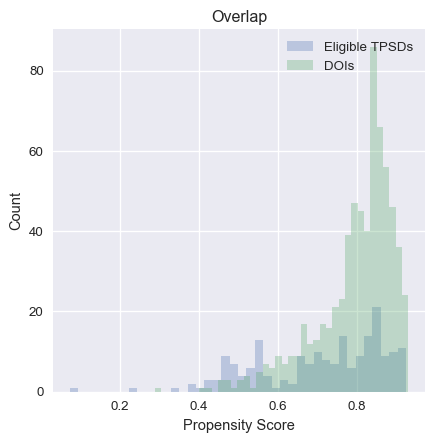

In [72]:
plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)


kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(df[df.treat == 0].ps, **kwargs, label = "Eligible TPSDs")
plt.hist(df[df.treat == 1].ps, **kwargs, label = "DOIs")

plt.legend()


plt.xlabel('Propensity Score')
plt.title('Overlap')
plt.ylabel('Count')
plt.show()


# Weight

In [75]:
df['psweight'] = df.treat+(1-df.treat)*df.ps/(1-df.ps)
df.head()

,distname,treat,type_rural,type_suburban,type_urban,hisp12,num12,hisp13,num13,hisp14,num14,hisp15,num15,ps,weight,wtshare,psweight
0,CAYUGA ISD,1,1,0,0,0.050847,590,0.075630,595,0.070524,553,0.064125,577,0.857158,1.0,0.000717,1.0
1,ELKHART ISD,1,0,0,0,0.078678,1271,0.090615,1236,0.090307,1207,0.088743,1217,0.911976,1.0,0.000717,1.0
2,FRANKSTON ISD,1,1,0,0,0.103683,733,0.105193,751,0.086614,762,0.103362,803,0.833157,1.0,0.000717,1.0
3,NECHES ISD,1,1,0,0,0.099256,403,0.096059,406,0.107969,389,0.110811,370,0.838313,1.0,0.000717,1.0
4,PALESTINE ISD,1,0,0,0,0.389752,3220,0.386861,3288,0.386148,3263,0.391110,3352,0.836509,1.0,0.000717,1.0


## Trim
No one observation weighted more than 4%

In [76]:
total_weight = sum(df[df.treat == 0].psweight)*len(df[df.treat == 0])
df['pswtshare'] = (df.psweight/total_weight)*100
df[df.pswtshare > 4]

,distname,treat,type_rural,type_suburban,type_urban,hisp12,num12,hisp13,num13,hisp14,num14,hisp15,num15,ps,weight,wtshare,psweight,pswtshare


# Merge PS Weight

In [78]:
ps = df[['distname', 'hisp12', 'hisp13', 'hisp14', 'hisp15', 'num12', 'num13', 'num14', 'num15', 'ps', 'psweight', 'pswtshare']]
cits_match = pd.merge(data, ps, on = 'distname')
cits_match.to_csv(os.path.join(data_path, 'clean', 'cits_match.csv'), sep=",")
cits_match.head()

,Unnamed: 0,district,distname,year,cntyname,distischarter,rating_academic,rating_financial,eligible,type,...,hisp13,hisp14,hisp15,num12,num13,num14,num15,ps,psweight,pswtshare
0,0,1902,CAYUGA ISD,2012,ANDERSON,N,NaN,NaN,NaN,H,...,0.07563,0.070524,0.064125,590,595,553,577,0.857158,1.0,0.000717
1,1227,1902,CAYUGA ISD,2013,ANDERSON,N,M,NaN,NaN,H,...,0.07563,0.070524,0.064125,590,595,553,577,0.857158,1.0,0.000717
2,2455,1902,CAYUGA ISD,2014,ANDERSON,N,M,NaN,NaN,H,...,0.07563,0.070524,0.064125,590,595,553,577,0.857158,1.0,0.000717
3,3682,1902,CAYUGA ISD,2015,ANDERSON,N,M,Pass,True,H,...,0.07563,0.070524,0.064125,590,595,553,577,0.857158,1.0,0.000717
4,4901,1902,CAYUGA ISD,2016,ANDERSON,N,M,Pass,True,H,...,0.07563,0.070524,0.064125,590,595,553,577,0.857158,1.0,0.000717
